# 06 Processing XMLs from https://extract.bbbike.org/

***2 Sep 2020***

- Primarily for visual comparison with [openstreetmap.org](https://www.openstreetmap.org)
- this notebook processes a selection of XML extracts downloaded from https://download.bbbike.org/osm/extract/

### Notes

- When processing the XMLs the whole of the XML has to processed, the tag filters can only be applied at the end
    - This means the area that can be processed from an XML may be quite small before memory issues are encountered
- Quite a large amount of geometry may need to be processed to extract quite a small amount of data
    - Files approximately > 90MB caused the kernel to crash
- Not passing in any tags or polygon will try to process whatever is in the XML to geometry
- XMLs seem to include clipped, incomplete geometries for example:
    - a line crossing the boundary will be included but only one node will be included
    - this causes empty geometries
- The Overpass API returns all of the data for geometries that overlap the edge of a query area

In [1]:
%load_ext autoreload
%autoreload 2

import geopandas as gpd
import osmnx as ox # using new `geometries` module
ox.utils.config(use_cache=True, log_console=True)

from helper_functions import carto_plot

local_file_path = '/media/nick/WDBlue/osmnx/XML/bbbike.org/'

## Shenzhen

https://www.openstreetmap.org/#map=12/22.5417/114.0285

In [2]:
osmnx_result = ox.geometries_from_xml(local_file_path + 'planet_113.894,22.4875_114.1378,22.6127.osm')
osmnx_result.to_crs(epsg=2326, inplace=True)

<AxesSubplot:>

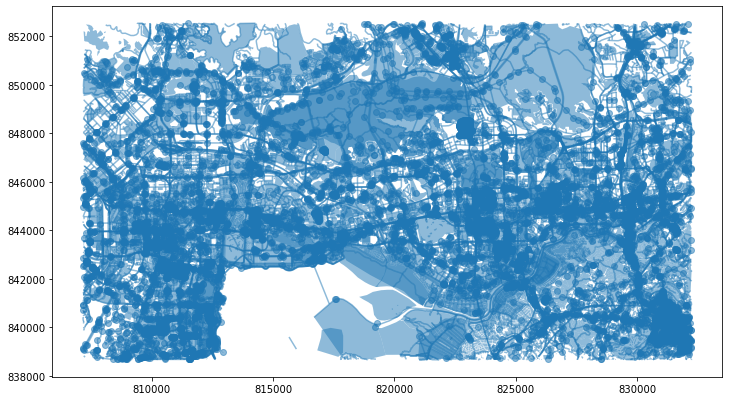

In [3]:
osmnx_result.plot(figsize=(12,12), alpha=0.5)

/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


(<Figure size 1152x1152 with 1 Axes>, <AxesSubplot:>)

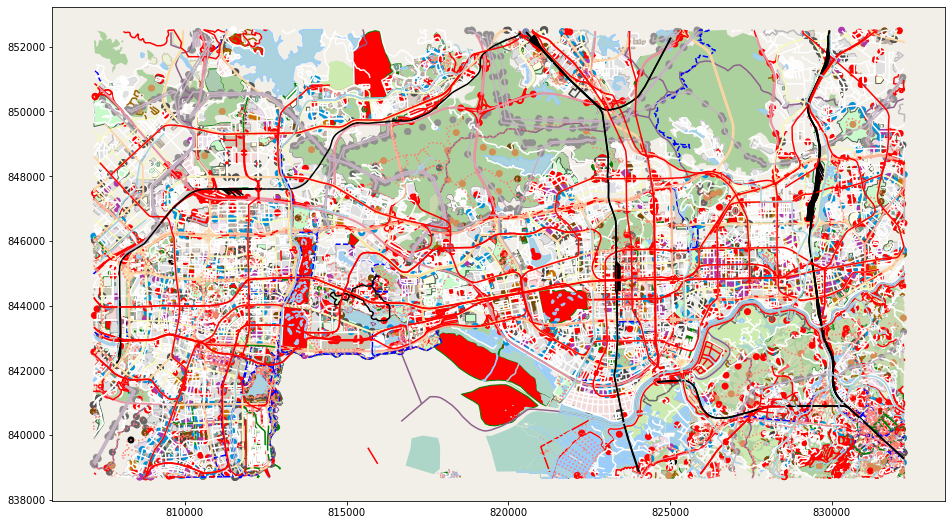

In [4]:
carto_plot(osmnx_result)

## Hawera

https://www.openstreetmap.org/#map=12/-39.5999/174.5000

In [5]:
osmnx_result = ox.geometries_from_xml(local_file_path + 'planet_174.288_-39.645_267549cf.osm')
osmnx_result.to_crs(epsg=2193, inplace=True)

/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarn

(<Figure size 1152x1152 with 1 Axes>, <AxesSubplot:>)

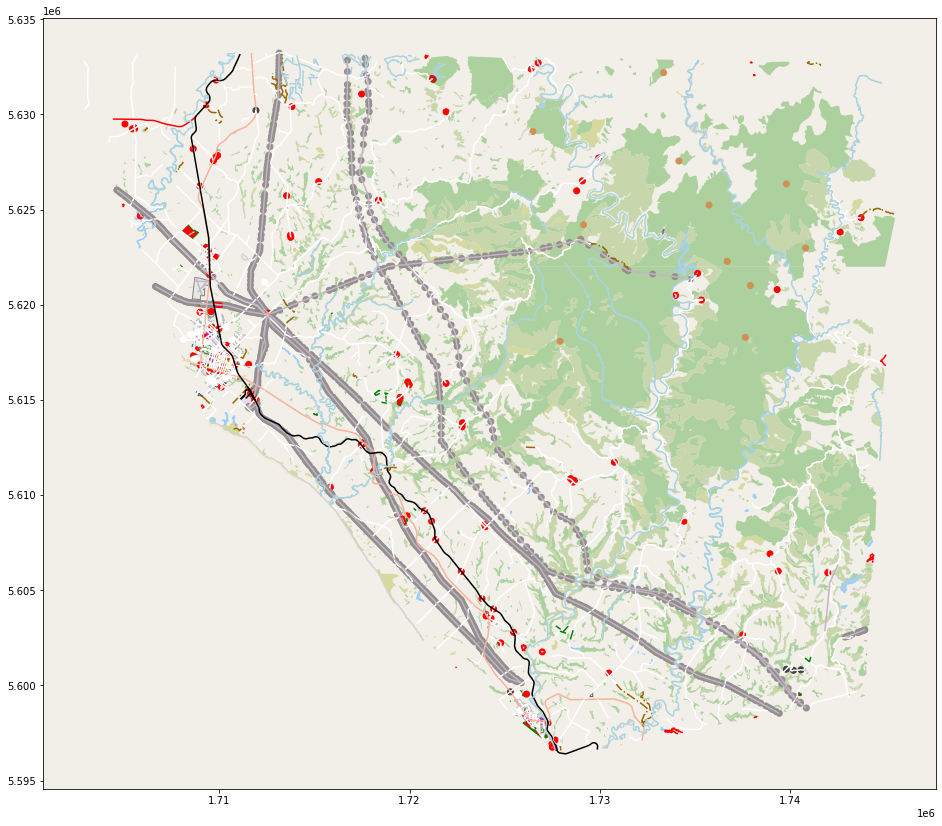

In [6]:
carto_plot(osmnx_result)

### Berlin

https://www.openstreetmap.org/#map=14/52.5116/13.3993

In [7]:
osmnx_result = ox.geometries_from_xml(local_file_path + 'planet_13.3627,52.4952_13.4483,52.5279.osm')

In [8]:
osmnx_result.to_crs(epsg=31468, inplace=True)

/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


(<Figure size 1152x1152 with 1 Axes>, <AxesSubplot:>)

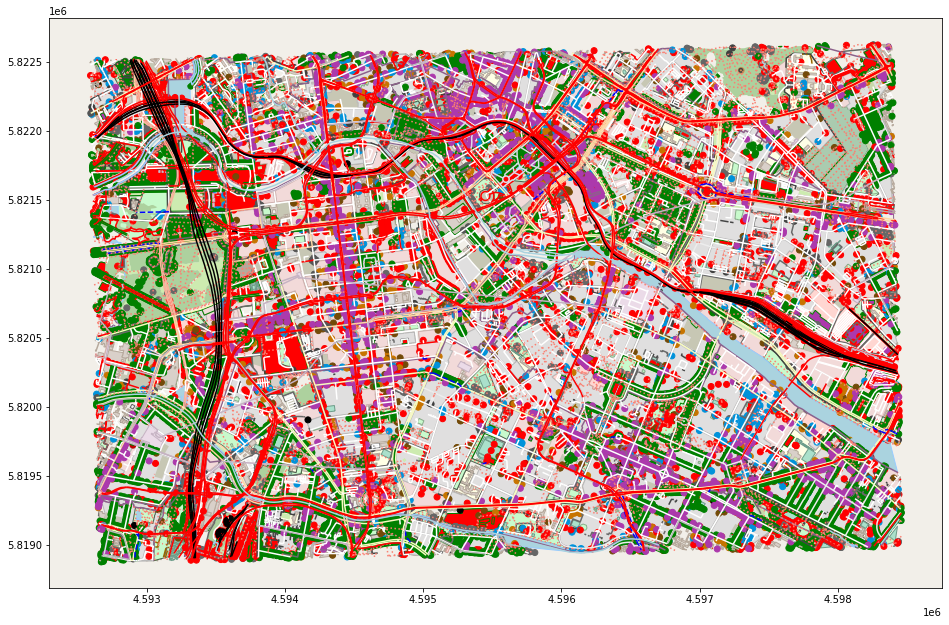

In [9]:
carto_plot(osmnx_result)

### Sacramento

https://www.openstreetmap.org/#map=15/38.5746/-121.4932

In [12]:
osmnx_result = ox.geometries_from_xml(local_file_path + 'planet_-121.508,38.567_-121.474,38.584.osm')
osmnx_result = ox.project_gdf(osmnx_result)

/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarn

(<Figure size 1152x1152 with 1 Axes>, <AxesSubplot:>)

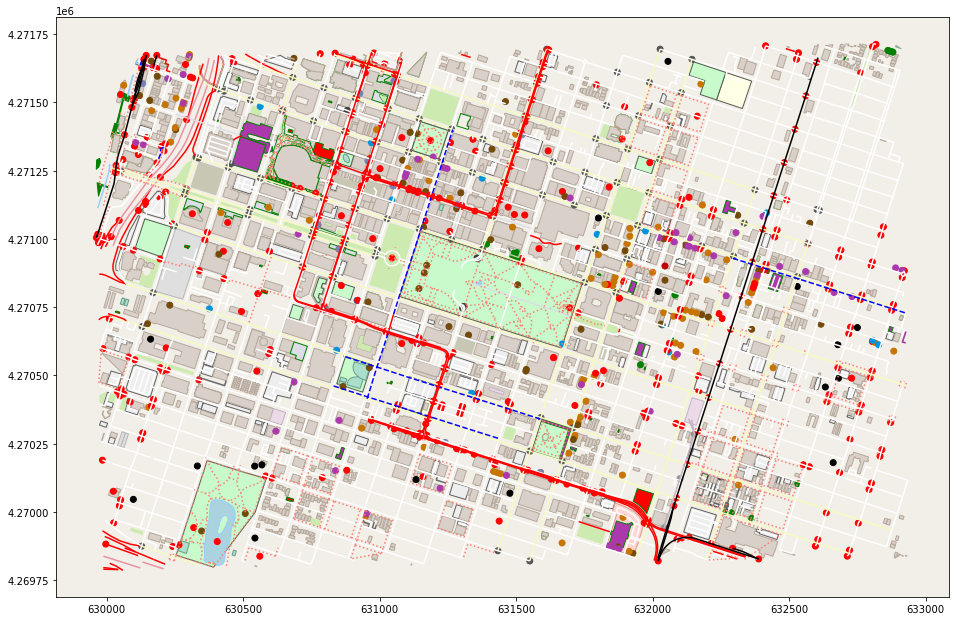

In [13]:
carto_plot(osmnx_result)